In [1]:
import pandas as pd

## 1. CCTV 설치 확인 데이터 

In [2]:
CCTV_seoul = pd.read_csv("../data/01. CCTV_in_Seoul.csv", encoding = 'utf-8')
CCTV_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


#### 데이터프레임 컬럼정보 확인 및 컬럼명 정리

In [3]:
CCTV_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_seoul.columns[0]

'기관명'

In [5]:
CCTV_seoul.rename(columns={CCTV_seoul.columns[0]:'구별'}, inplace = True)
CCTV_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
CCTV_seoul.columns = ['구별', '소계', '2013년', '2014년', '2015년', '2016년']
CCTV_seoul.head()

,구별,소계,2013년,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 2.엑셀파일 읽기 - 서울시 인구 현황 및 컬럼정리

In [7]:
pop_seoul = pd.read_excel("../data/01. population_in_Seoul.xls", encoding='utf-8', 
                          header = 2,
                          usecols ='B, D, G, J, N' )
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
pop_seoul.rename(columns = {
                            pop_seoul.columns[0] : '구별',
                            pop_seoul.columns[1] : '인구수',
                            pop_seoul.columns[2] : '한국인',
                            pop_seoul.columns[3] : '외국인',
                            pop_seoul.columns[4] : '고령자'
                            }
                            ,inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 3. CCTV데이터 파악하기

In [9]:
CCTV_seoul.head()

,구별,소계,2013년,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [10]:
CCTV_seoul.sort_values(by='소계', ascending = True).head(n = 5)

,구별,소계,2013년,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [11]:
CCTV_seoul.sort_values(by='소계', ascending = False).head(n = 5)

,구별,소계,2013년,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [12]:
CCTV_seoul['최근증가율'] = (CCTV_seoul['2016년'] + CCTV_seoul['2015년'] + CCTV_seoul['2014년']) / CCTV_seoul['2013년'] * 100

In [13]:
CCTV_seoul.sort_values(by = '최근증가율', ascending = False).head(n = 5)

,구별,소계,2013년,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


## 4. 서울시 인구 데이터 파악하기

In [14]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [15]:
pop_seoul.drop([0], inplace = True)

In [16]:
pop_seoul['구별'].unique()  # 

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [17]:
pop_seoul['구별'].isnull() # 널인것 찾기

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [18]:
pop_seoul['구별'].drop([26], inplace = True)  # NaN인 것 삭제

In [19]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [20]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [21]:
pop_seoul.sort_values(by='인구수' , ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [22]:
pop_seoul.sort_values(by='외국인' , ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [23]:
pop_seoul.sort_values(by='외국인비율' , ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [24]:
pop_seoul.sort_values(by='고령자' , ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [25]:
pop_seoul.sort_values(by='고령자비율' , ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


## 5. CCTV데이터와 인구 데이터 합치고 분석하기

In [26]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [27]:
CCTV_seoul.head()

,구별,소계,2013년,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [28]:
data_result = pd.merge(left = CCTV_seoul, right = pop_seoul, on= '구별')
data_result.head()

,구별,소계,2013년,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [29]:
# drop - 행방향 삭제, del - 열 삭제
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [30]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [31]:
data_result.set_index('구별', inplace = True)

In [32]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


상관관계 분석
* 상관분석은 상관계수의 절대값이 클수록 두 데이터는 관계가 있다고 볼수있음
* 상관계수의 절대값이 0.1이하이면 거의 무시
* 상관계수가 0.3이상이면 약한 상관관계
* 0.7 이상이면 뚜렷한 상관관계

In [33]:
import numpy as np

np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [34]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [35]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [36]:
data_result.sort_values(by='소계',ascending = False).head(n = 5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [37]:
data_result.sort_values(by='인구수',ascending = False).head(n = 5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 6 .CCTV와 인구현황 그래프로 분석하기

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 

# 폰트 적용
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    f_path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=f_path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system..sorry.')

In [39]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


[파이썬 차트 참조](https://python-graph-gallery.com/all-charts/)

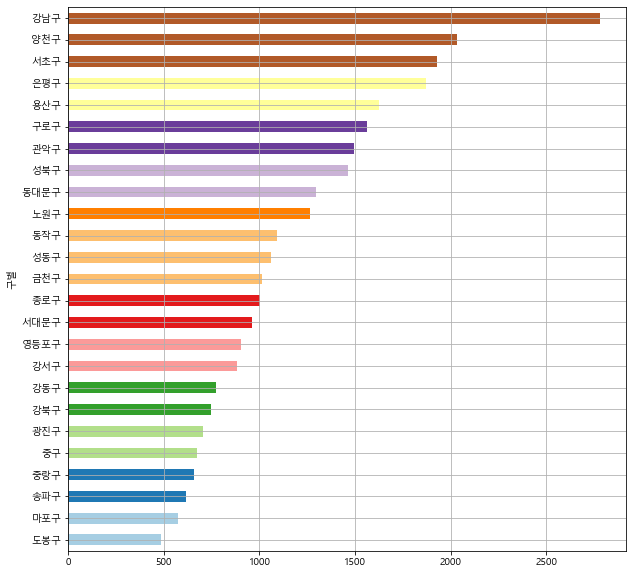

In [146]:
colors = cm.Paired(np.linspace(0,1,len(data_result)))
plt.figure()
data_result['소계'].sort_values().plot(kind = 'barh', grid=True, figsize = (10, 10), color = colors)  # kind=bar
plt.show()

In [42]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

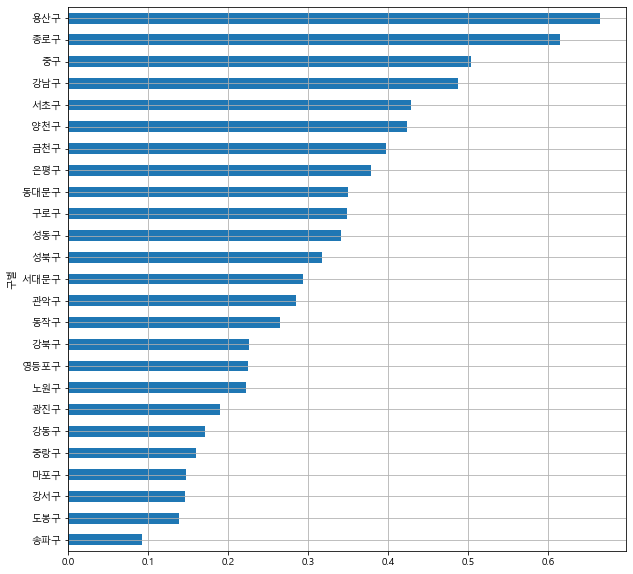

In [43]:
plt.figure()
data_result['CCTV비율'].sort_values().plot(kind='barh',
                                        grid = True,
                                        figsize = (10, 10))
plt.show()

#### 산점도

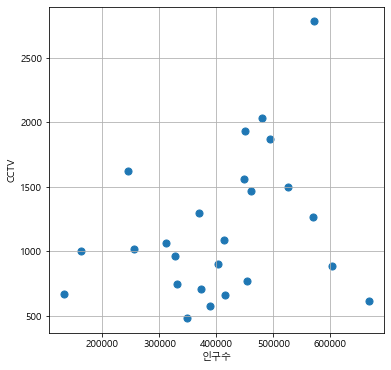

In [44]:
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [45]:
# 기울기, 절편, 1차원
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [46]:
f1 = np.poly1d(fp1) # 매개변수로부터 모델 생성
fx = np.linspace(100000, 700000, 100) # 시작, 끝(포함), 갯수

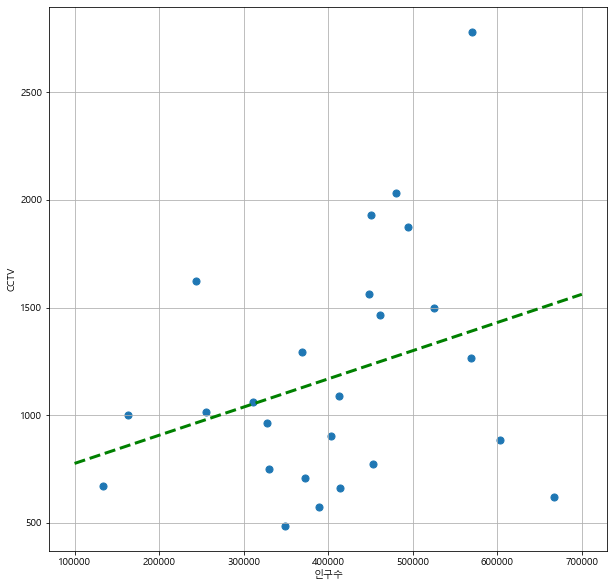

In [47]:
# 인구수 대비 CCTV계수에 대한 함수 
plt.figure(figsize = (10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.plot(fx, f1(fx), ls='dashed', lw = 3, color = 'g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

## 7. 조금 더 설득력있는 자료만들기

In [48]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차', ascending = False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


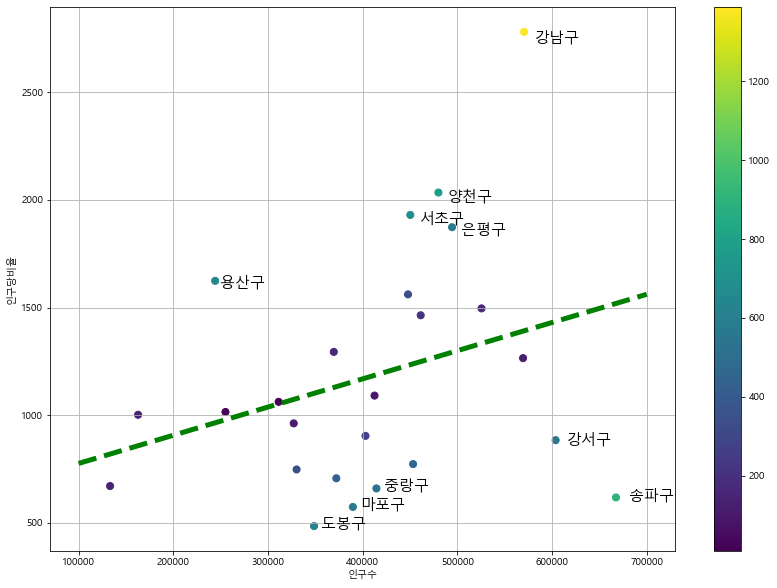

In [49]:
plt.figure(figsize = (14,10))

# X축, Y축, 점의 색깔(color) , 크기 (size)
plt.scatter(data_result['인구수'], data_result['소계'], c = data_result['오차'], s = 50)

# lw : 라인의 너비, color = 'g', ls : line style
plt.plot(fx, f1(fx), ls='dashed', lw = 5, color = 'g')   

# X축은 조금 오른쪽 y축은 왼쪽 인덱스 (구 이름) 뿌려줌
for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n] * 0.98,
            df_sort.index[n], fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

# 오른쪽의 색깔기둥
plt.colorbar()

plt.grid()  #격자 무늬보여주기 - default True
plt.show()

* 서울시에 다른 구와 비교했을때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지마나 
* 송파구 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV비율이 낮다.

### Quiz

1. 데이터 분석을 위해
k201901.xlsx 데이터를 아래와 같이 전처리 해 보세요.

2. 아래에서 5건 출력해 보세요.

3. 총 데이터 개수 및 칼럼, 변수 타임을 확인하세요.

4. 관광, 사용, 공용, 유학/연수에서 0으로 입력된 데이터를 확인하세요.

5. 기준년월 칼럼을 추가하세요.

6. 국적에 어떤 항목들이 있는지 확인하세요.

7. 국적 칼럼에 국가명 데이터만 남기세요.
(즉 국가 레벨이 아닌 대륙 7개는 제외하세요.-아시아주, 미주, 구주..등)

8. 인덱스를 재설정 하세요.


9. 대륙 칼럼을 추가하세요.

10. 관광객 비율을 구하세요.

11. 중국인 중에서 관광 목적으로 방문하는 비율이 얼마나 되는지 확인하세요.

12. 전체 비율을 구하세요. 
13. 전체 비율칼럼 기준 내림차순으로 정렬하세요.
(여기까지 결과는 아래와 같습니다.)

14. 13을 그래프로 그려 보세요.

In [190]:
#1. 데이터 분석을 위해
df = pd.read_excel("../data/k_201901.xlsx", header = 1, usecols = 'A, B, C, E, F, G')
df.head(n = 5)

Int64Index([25], dtype='int64')

총 데이터 갯수  : 53
변수 타입

국적        object
관광       float64
상용       float64
유학/연수    float64
기타       float64
계        float64
기준년월      object
대륙        object
dtype: object


컬럼 :
 Index(['국적', '관광', '상용', '유학/연수', '기타', '계', '기준년월', '대륙'], dtype='object')


['일본' '대만' '홍콩' '마카오' '태국' '말레이시아' '필리핀' '인도네시아' '싱가포르' '미얀마' '베트남' '인도'
 '스리랑카' '파키스탄' '방글라데시' '캄보디아' '몽골' '중국' '이란' '이스라엘' '터키' '우즈베키스탄' '카자흐스탄'
 'GCC' '미국' '캐나다' '멕시코' '브라질' '영국' '독일' '프랑스' '네덜란드' '스웨덴' '스위스' '이탈리아'
 '덴마크' '노르웨이' '벨기에' '오스트리아' '스페인' '그리스' '포르투갈' '핀란드' '아일랜드' '우크라이나' '러시아'
 '크로아티아' '루마니아' '불가리아' '폴란드' '오스트레일리아' '뉴질랜드' '남아프리카공화국']


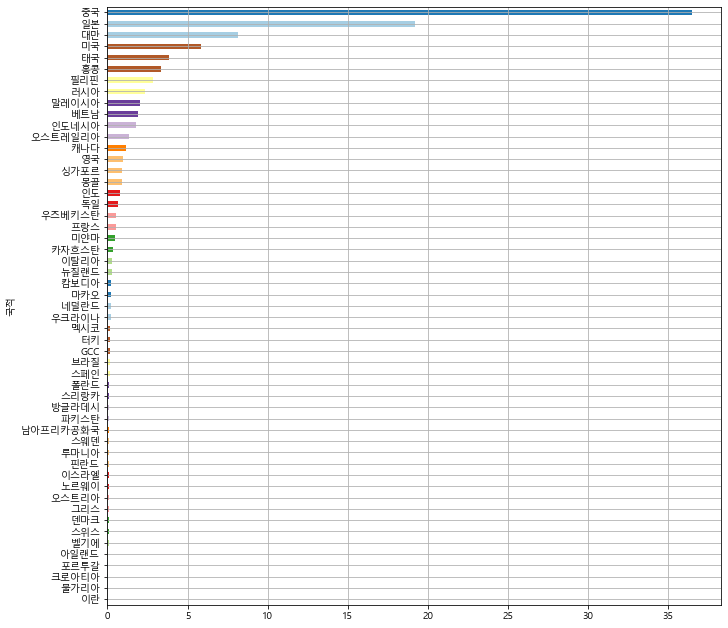

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline 

# 폰트 적용
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    f_path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=f_path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system..sorry.')

#2.총데이터 갯수 및 칼럼, 변수타입 확인
print('총 데이터 갯수  :' , df.shape[0])
print('변수 타입\n')
print(df.dtypes)
print("\n")
print("컬럼 :\n", df.columns)

#4. 관광, 사용, 공용, 유학/연수에서 0으로 입력된 데이터를 확인하세요.
c1 = df['관광'] == 0
c2 = df['상용'] == 0
c3 = df['유학/연수'] == 0
subset_df = df[c1 | c2 | c3]
subset_df

#5. 기준년월 칼럼을 추가하세요.
from datetime import datetime

now = datetime.now().strftime("%Y-%m")
df['기준년월'] = now

# 6. 국적에 어떤 항목들이 있는지 확인하세요.
print("\n")
print(df['국적'].unique())

# 7. 국적 칼럼에 국가명 데이터만 남기세요.(즉 국가 레벨이 아닌 대륙 7개는 제외하세요.-아시아주, 미주, 구주..등)
notNation = df['국적'].str.contains('주', regex=False)
etcNation = df['국적'].str.contains('기타', regex=False)
other     = df['국적'].str.contains('성장률|구성비|계|교포|국적미상|전년동기', regex=True)
delDf = df[notNation | etcNation | other]

df.drop(index = delDf.index, inplace = True)
df

# 8. 인덱스를 재설정 하세요.
df.reset_index(drop=True)

# 9. 대륙 칼럼을 추가하세요.
df['대륙'] = ""

asia = df[df['국적'] == '아시아 기타'].index
america = df[df['국적'] == '미주 기타'].index
europe = df[df['국적'] == '구주 기타'].index
oceania = df[df['국적'] == '대양주 기타'].index
africa = df[df['국적'] == '아프리카 기타'].index

df[:asia[0]+1]['대륙'] = '아시아'
df[asia[0]+1:america[0]+1]['대륙'] = '아메리카'
df[america[0]+1:europe[0]+1]['대륙'] = '유럽'
df[europe[0]+1:oceania[0]+1]['대륙'] = '오세아니아'
df[oceania[0]+1:africa[0]+1]['대륙'] = '아시아'
df[africa[0]+1:]['대륙'] = '기타'

# 10. 관광객 비율을 구하세요.
df['관광객비율'] = df['관광'] / df['계'] * 100
df.head()

# 11. 중국인 중에서 관광 목적으로 방문하는 비율이 얼마나 되는지 확인하세요.
df.loc[df['국적']=='중국', '관광객비율']

# 12. 전체 비율을 구하세요. 
df['전체비율'] = df['계'] / df['계'].sum() * 100

# 13. 전체 비율칼럼 기준 내림차순으로 정렬하세요.
df.sort_values(by='전체비율', ascending=False)

# 14. 13을 그래프로 그려 보세요.
df.index = df['국적']
colors = cm.Paired(np.linspace(0,1,len(data_result)))
plt.figure()
df['전체비율'].sort_values().plot(kind = 'barh', grid=True, figsize = (11, 11), color = colors)  # kind=bar
plt.show()